In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
!pip install fitter
!pip install ucimlrepo
!pip install pandas ucimlrepo
!pip install seaborn matplotlib

**SERIES DE TIEMPO**

In [220]:
#1.Leer el dataset desde el github.

url="https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv"

df=pd.read_csv(url)
df


,Unnamed: 0,time,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
0,0,2022-07-25 13:00:00,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
1,1,2022-07-25 14:00:00,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2,2,2022-07-25 15:00:00,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
3,3,2022-07-25 16:00:00,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
4,4,2022-07-25 17:00:00,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,2023-05-12 19:00:00,1.08552,1.08569,1.08485,1.08514,2275,8,0,1.085330,-0.00038,-0.00071,-0.000545
4996,4996,2023-05-12 20:00:00,1.08516,1.08567,1.08502,1.08546,1676,8,0,1.085310,0.00032,-0.00036,-0.000020
4997,4997,2023-05-12 21:00:00,1.08546,1.08546,1.08487,1.08531,1828,8,0,1.085385,-0.00015,0.00030,0.000075
4998,4998,2023-05-12 22:00:00,1.08531,1.08549,1.08506,1.08518,1374,8,0,1.085245,-0.00013,-0.00015,-0.000140


In [221]:
# 2. Definir como indice la columna time.

df = pd.read_csv(url, index_col="time")
df.index = pd.to_datetime(df.index)
df


,Unnamed: 0,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
time,,,,,,,,,,,,
2022-07-25 13:00:00,0,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
2022-07-25 14:00:00,1,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2022-07-25 15:00:00,2,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
2022-07-25 16:00:00,3,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
2022-07-25 17:00:00,4,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-12 19:00:00,4995,1.08552,1.08569,1.08485,1.08514,2275,8,0,1.085330,-0.00038,-0.00071,-0.000545
2023-05-12 20:00:00,4996,1.08516,1.08567,1.08502,1.08546,1676,8,0,1.085310,0.00032,-0.00036,-0.000020
2023-05-12 21:00:00,4997,1.08546,1.08546,1.08487,1.08531,1828,8,0,1.085385,-0.00015,0.00030,0.000075


In [222]:
# 3. Obtenga información del data frame.

a=df.info()#df.info() Muestra información sobre el DataFrame
a

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000 entries, 2022-07-25 13:00:00 to 2023-05-12 23:00:00
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          5000 non-null   int64  
 1   open                5000 non-null   float64
 2   high                5000 non-null   float64
 3   low                 5000 non-null   float64
 4   close               5000 non-null   float64
 5   tick_volume         5000 non-null   int64  
 6   spread              5000 non-null   int64  
 7   real_volume         5000 non-null   int64  
 8   MeanCloseOpen       5000 non-null   float64
 9   Diff_Close          5000 non-null   float64
 10  Diff_Open           5000 non-null   float64
 11  Diff_MeanCloseOpen  5000 non-null   float64
dtypes: float64(8), int64(4)
memory usage: 507.8 KB


In [223]:
# 4. Determine si hay null, nan en el data frame.

nulo= df.isnull().sum()  #isnull() Devuelve un dataframe con booleanos para ver si hay nulos , sum() suma todos los valores True (nulos) del dataframe
print(nulo)

print("Así, no hay nulos en el dataframe")

Unnamed: 0            0
open                  0
high                  0
low                   0
close                 0
tick_volume           0
spread                0
real_volume           0
MeanCloseOpen         0
Diff_Close            0
Diff_Open             0
Diff_MeanCloseOpen    0
dtype: int64
Así, no hay nulos en el dataframe


In [224]:
# 5. Emplea la notacion Pascal Case y trabaja solo con la columa del precio de cierre del eur/usd.

dclose = df[['close']]
dclose

,close
time,
2022-07-25 13:00:00,1.02345
2022-07-25 14:00:00,1.02299
2022-07-25 15:00:00,1.02457
2022-07-25 16:00:00,1.02485
2022-07-25 17:00:00,1.02181
...,...
2023-05-12 19:00:00,1.08514
2023-05-12 20:00:00,1.08546
2023-05-12 21:00:00,1.08531


In [225]:
# 6. Ahora vamos a determinar cual es la mejor distribución estadística que se ajusta a la diferencia del precio de cierre cada hora, para ello realizamos lo siguiente:

# a) Determine la diferencia de precio entre horas, agregue una nueva columna llamada DiffPrice, en este punto tu dataframe debe tener solo dos columnas Close, DiffPrice y el indice debe ser el tiempo.


df['DiffPrice'] = df['close'].diff()  # Se crea la columna DiffPrice y usamos .diff( ) que hace la diferencia entre valores consecutivos en una columna.

dif = df[['close', 'DiffPrice']]
dif

,close,DiffPrice
time,,
2022-07-25 13:00:00,1.02345,NaN
2022-07-25 14:00:00,1.02299,-0.00046
2022-07-25 15:00:00,1.02457,0.00158
2022-07-25 16:00:00,1.02485,0.00028
2022-07-25 17:00:00,1.02181,-0.00304
...,...,...
2023-05-12 19:00:00,1.08514,-0.00038
2023-05-12 20:00:00,1.08546,0.00032
2023-05-12 21:00:00,1.08531,-0.00015


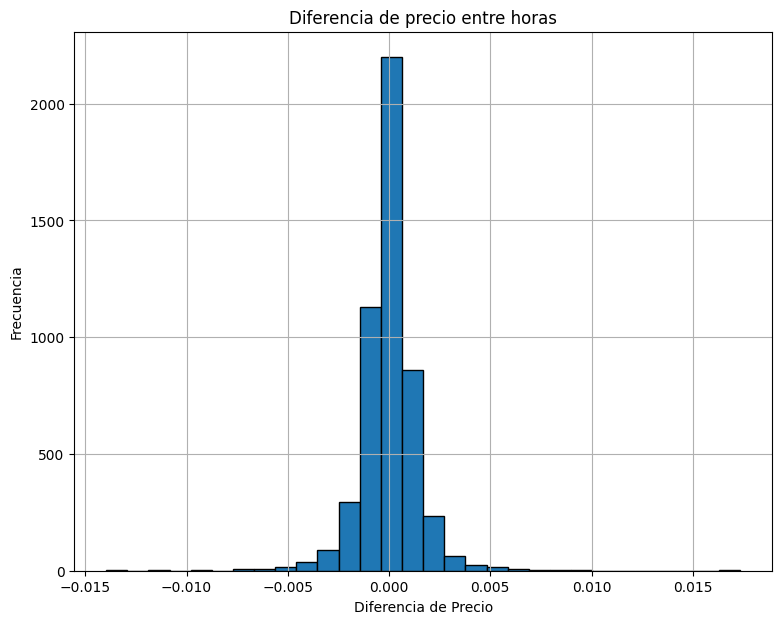

In [226]:
# b. Para la nueva columna construya un histograma de los datos.

plt.figure(figsize=(9,7))
plt.hist(df['DiffPrice'].dropna(), bins=30, edgecolor='black')
plt.title('Diferencia de precio entre horas')
plt.xlabel('Diferencia de Precio')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Así la mejor distribución que se ajusta al histograma es una normal


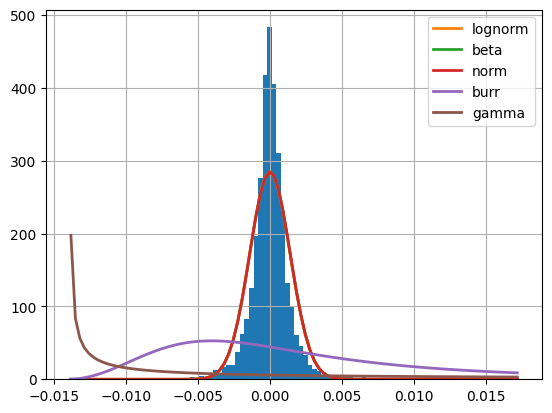

In [227]:
# c. Determine la mejor distribucion estadística que se ajusta al histograma anterior.

from fitter import Fitter, get_common_distributions, get_distributions
data = df['DiffPrice'].dropna()
f = Fitter(data,
            distributions=['gamma',
                           'lognorm',
                           'beta',
                           'burr',
                           'norm'])

f.fit()

f.summary()
# Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
# Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]

print("Así la mejor distribución que se ajusta al histograma es una normal")

In [228]:
# 7. Para el data frame, seleccionemos solo los datos del 2023.

df.index = pd.to_datetime(df.index)  # El índice esta en formato datetime

data2023 = df[df.index.year == 2023] #filtramos, y cogemos solo los datos del 2023

data2023



,Unnamed: 0,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen,DiffPrice
time,,,,,,,,,,,,,
2023-01-02 00:00:00,2722,1.06998,1.07061,1.06795,1.06796,98,57,0,1.068970,-0.00200,-0.00063,-0.001315,-0.00200
2023-01-02 01:00:00,2723,1.06847,1.06965,1.06847,1.06965,91,183,0,1.069060,0.00169,-0.00151,0.000090,0.00169
2023-01-02 02:00:00,2724,1.06965,1.07060,1.06904,1.07058,325,11,0,1.070115,0.00093,0.00118,0.001055,0.00093
2023-01-02 03:00:00,2725,1.07058,1.07075,1.06837,1.06896,271,26,0,1.069770,-0.00162,0.00093,-0.000345,-0.00162
2023-01-02 04:00:00,2726,1.06895,1.06896,1.06799,1.06880,137,78,0,1.068875,-0.00016,-0.00163,-0.000895,-0.00016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-12 19:00:00,4995,1.08552,1.08569,1.08485,1.08514,2275,8,0,1.085330,-0.00038,-0.00071,-0.000545,-0.00038
2023-05-12 20:00:00,4996,1.08516,1.08567,1.08502,1.08546,1676,8,0,1.085310,0.00032,-0.00036,-0.000020,0.00032
2023-05-12 21:00:00,4997,1.08546,1.08546,1.08487,1.08531,1828,8,0,1.085385,-0.00015,0.00030,0.000075,-0.00015


In [229]:
#8 El comando groupby permite agrupar los datos con la periodicidad deseada: 1 dias, 2 dias, 1 mes etc. Determina el promedio con una periodicidad de 15 dias, con periodidicidad de 1 semana, y una periodicidad de 1 mes

df.index = pd.to_datetime(df.index)

# Promedio con periodicidad de 15 días
promedio_15_dias = df.resample('15D').mean()

# Promedio con periodicidad de 1 semana
promedio_1_semana = df.resample('W').mean()

# Promedio con periodicidad de 1 mes
promedio_1_mes = df.resample('M').mean()

# Mostrar los resultados
print("Promedio cada 15 días:\n", promedio_15_dias.head())
print("\nPromedio cada semana:\n", promedio_1_semana.head())
print("\nPromedio cada mes:\n", promedio_1_mes.head())



Promedio cada 15 días:
             Unnamed: 0      open      high       low     close  tick_volume  \
time                                                                          
2022-07-25       125.0  1.019610  1.020562  1.018630  1.019602  3789.107570   
2022-08-09       382.5  1.016238  1.016969  1.015419  1.016159  2972.234848   
2022-08-24       646.5  0.996908  0.997953  0.995986  0.996934  3684.606061   
2022-09-08       910.5  0.999835  1.000790  0.998795  0.999753  4266.166667   
2022-09-23      1174.5  0.976705  0.978025  0.975436  0.976675  5837.492424   

              spread  real_volume  MeanCloseOpen  Diff_Close  Diff_Open  \
time                                                                      
2022-07-25  9.119522          0.0       1.019606   -0.000019  -0.000023   
2022-08-09  9.208333          0.0       1.016199   -0.000086  -0.000085   
2022-08-24  8.992424          0.0       0.996921    0.000015   0.000015   
2022-09-08  8.893939          0.0       0.99979

<ipython-input-229-7eae0a0206cb>:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  promedio_1_mes = df.resample('M').mean()


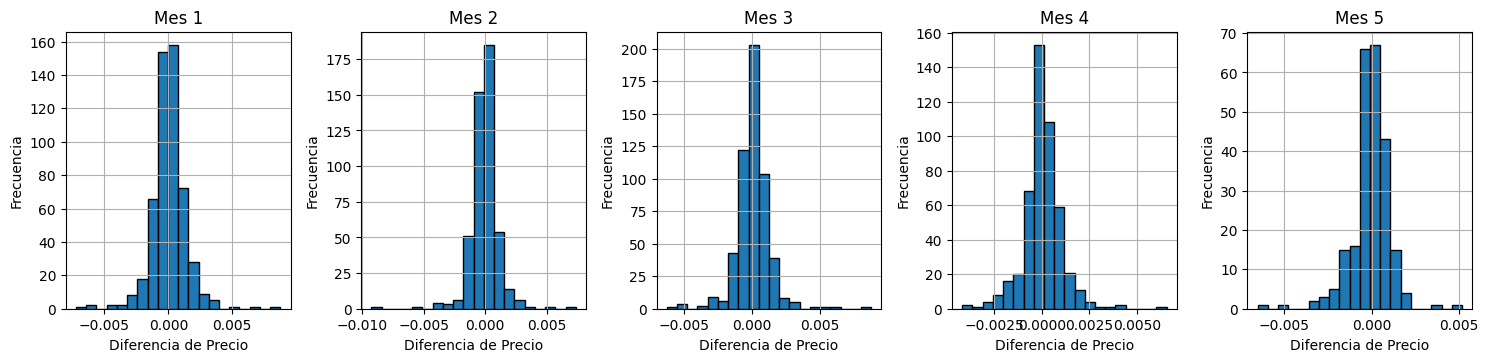

In [230]:
#9. Para los datos asociados a los meses de 2023, construya un histograma para cada mes. Para ello puedo emplear el metodo groupby.
#Notese que si no realiza una operación después de aplicar el metodo grouby, podrias iterar sobre dicho objeto.

agrupa = data2023.groupby(data2023.index.month) #Cogimos los datos que agrupamos previamente del 2023 y estos los agrupamos por mes

plt.figure(figsize=(15, 10))

for mes, data in agrupa:
    plt.subplot(3, 5, mes)  # Toca plotear por mes
    plt.hist(data['DiffPrice'].dropna(), bins=20, edgecolor='black')  # Histogramas
    plt.title(f'Mes {mes}')
    plt.xlabel('Diferencia de Precio')
    plt.ylabel('Frecuencia')
    plt.grid(True)

plt.tight_layout()
plt.show()

**ANÁLISIS DE DATOS CON PANDAS**

Para el dataset hacer lo siguiente:

In [231]:

#1. Leer los datos desde una página web.
from ucimlrepo import fetch_ucirepo

# fetch dataset

breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# Convertir X a un DataFrame
df_X = pd.DataFrame(X)

# Convertir y a un DataFrame
df_y = pd.DataFrame(y )

# Combinar X y Y en un solo DataFrame
df = pd.concat([df_X, df_y], axis=1)



# metadata
#print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)

df1=pd.DataFrame(breast_cancer_wisconsin_diagnostic.variables)

#df2=pd.DataFrame(breast_cancer_wisconsin_diagnostic.metadata)

df



                  name     role         type demographic description units  \
0                   ID       ID  Categorical        None        None  None   
1            Diagnosis   Target  Categorical        None        None  None   
2              radius1  Feature   Continuous        None        None  None   
3             texture1  Feature   Continuous        None        None  None   
4           perimeter1  Feature   Continuous        None        None  None   
5                area1  Feature   Continuous        None        None  None   
6          smoothness1  Feature   Continuous        None        None  None   
7         compactness1  Feature   Continuous        None        None  None   
8           concavity1  Feature   Continuous        None        None  None   
9      concave_points1  Feature   Continuous        None        None  None   
10           symmetry1  Feature   Continuous        None        None  None   
11  fractal_dimension1  Feature   Continuous        None        

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


In [232]:
# 2.Renombrar las columnas en formato PascalCase.


df.columns = [col.replace(' ', '').title() for col in df.columns] #Renombramos las columnnas en formato Pascal Case
df

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,Concave_Points1,Symmetry1,Fractal_Dimension1,...,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,Concave_Points3,Symmetry3,Fractal_Dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


In [233]:
#3 Utilizar los métodos head(), tail(), describe() e info() para obtener información sobre el DataFrame.

cabe= df.head()
print(cabe)


   Radius1  Texture1  Perimeter1   Area1  Smoothness1  Compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   

   Concavity1  Concave_Points1  Symmetry1  Fractal_Dimension1  ...  Texture3  \
0      0.3001          0.14710     0.2419             0.07871  ...     17.33   
1      0.0869          0.07017     0.1812             0.05667  ...     23.41   
2      0.1974          0.12790     0.2069             0.05999  ...     25.53   
3      0.2414          0.10520     0.2597             0.09744  ...     26.50   
4      0.1980          0.10430     0.1809             0.05883  ...     16.67   

   Perimeter3   Area3  Smoothness3  Compactness3  Concavity3  Concave_Points3  \
0      184.

In [234]:
cola=df.tail()
print(cola)


     Radius1  Texture1  Perimeter1   Area1  Smoothness1  Compactness1  \
564    21.56     22.39      142.00  1479.0      0.11100       0.11590   
565    20.13     28.25      131.20  1261.0      0.09780       0.10340   
566    16.60     28.08      108.30   858.1      0.08455       0.10230   
567    20.60     29.33      140.10  1265.0      0.11780       0.27700   
568     7.76     24.54       47.92   181.0      0.05263       0.04362   

     Concavity1  Concave_Points1  Symmetry1  Fractal_Dimension1  ...  \
564     0.24390          0.13890     0.1726             0.05623  ...   
565     0.14400          0.09791     0.1752             0.05533  ...   
566     0.09251          0.05302     0.1590             0.05648  ...   
567     0.35140          0.15200     0.2397             0.07016  ...   
568     0.00000          0.00000     0.1587             0.05884  ...   

     Texture3  Perimeter3   Area3  Smoothness3  Compactness3  Concavity3  \
564     26.40      166.10  2027.0      0.14100      

In [235]:
inf=df.info()
print(inf)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Radius1             569 non-null    float64
 1   Texture1            569 non-null    float64
 2   Perimeter1          569 non-null    float64
 3   Area1               569 non-null    float64
 4   Smoothness1         569 non-null    float64
 5   Compactness1        569 non-null    float64
 6   Concavity1          569 non-null    float64
 7   Concave_Points1     569 non-null    float64
 8   Symmetry1           569 non-null    float64
 9   Fractal_Dimension1  569 non-null    float64
 10  Radius2             569 non-null    float64
 11  Texture2            569 non-null    float64
 12  Perimeter2          569 non-null    float64
 13  Area2               569 non-null    float64
 14  Smoothness2         569 non-null    float64
 15  Compactness2        569 non-null    float64
 16  Concavit

In [236]:
#4 Contabilizar la cantidad de valores nulos (null o NaN) en el DataFrame. Si se encuentran valores nulos, ¿qué estrategia propondrías para reemplazarlos?

nan= df.isnull().sum()  #isnull() Devuelve un dataframe con booleanos para ver si hay nulos , sum() suma todos los valores True (nulos) del dataframe
nan

,0
Radius1,0
Texture1,0
Perimeter1,0
Area1,0
Smoothness1,0
Compactness1,0
Concavity1,0
Concave_Points1,0
Symmetry1,0
Fractal_Dimension1,0


In [237]:
none=df1.isnull().sum()
none

,0
name,0
role,0
type,0
demographic,32
description,32
units,32
missing_values,0


**En el dataframe  obtenido a partir de breast_cancer_wisconsin_diagnostic.variables (df1) tenemos columnas las cuales todos sus valores son  None, por lo cual la mejor solución es prescindir  de dichas columnas ya que en verdad no estan aportando información sobre el conjunto de datos y solo me están llenando espacio. Por otro lado en el dataframe principal df no tenemos valores con NaN o None**

In [238]:
# 5.Identificar los valores únicos en la columna target que representan las etiquetas B y M (Benigno y Maligno, respectivamente). Utiliza el método unique() para mostrar estos valores.

unique_targets = df['Diagnosis'].unique()
print(unique_targets)

['M' 'B']


<ipython-input-239-3471c5640bd3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DiagnosisNumeric', data=df, palette='Set2')  # Cuenta las ocurrencias y hace un grafico de barras
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


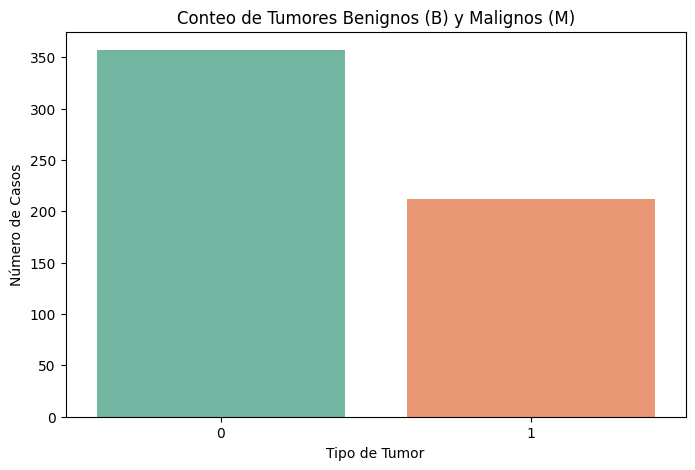

In [239]:
# 6. Realizar un conteo de los casos etiquetados como B y M utilizando la librería seaborn y el método countplot()

df['DiagnosisNumeric'] = df['Diagnosis'].map({'B':0 , 'M': 1})  # Se crea una nueva columna donde se convierte B a 0 y M a 1 para así poder hacer un conteo

plt.figure(figsize=(8, 5))
sns.countplot(x='DiagnosisNumeric', data=df, palette='Set2')  # Cuenta las ocurrencias y hace un grafico de barras

# Configurar el título y etiquetas
plt.title('Conteo de Tumores Benignos (B) y Malignos (M)')
plt.xlabel('Tipo de Tumor')
plt.ylabel('Número de Casos')

# Mostrar el gráfico
plt.show()




In [240]:
# 7. Agregar una nueva columna llamada DiagnosisNumeric donde se asigna el valor 0 a la etiqueta B (Benigno) y el valor 1 a la etiqueta M (Maligno).

df['DiagnosisNumeric'] = df['Diagnosis'].map({'B':0 , 'M': 1})

bm=df[['Diagnosis', 'DiagnosisNumeric']]

bm

,Diagnosis,DiagnosisNumeric
0,M,1
1,M,1
2,M,1
3,M,1
4,M,1
...,...,...
564,M,1
565,M,1
566,M,1
567,M,1


In [241]:
# 8. Normalizar cada columna respecto a su media y desviación estándar utilizando la fórmula:
#(x - mean(x)) / std(x)

df_norma = (df_X - df_X.mean()) / df_X.std()


df_norma

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,-0.312314,-0.930209,...,1.899514,0.117596,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963,-0.708467
565,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,-0.217473,-1.057681,...,1.535369,2.045599,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387,-0.973122
566,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,-0.808406,-0.894800,...,0.560868,1.373645,0.578492,0.427529,-0.808876,0.350427,0.326479,0.413705,-1.103578,-0.318129
567,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,2.135315,1.042778,...,1.959515,2.235958,2.301575,1.651717,1.429169,3.901415,3.194794,2.287972,1.917396,2.217684


In [242]:
# 9.Agrupar características similares y calcular su promedio. Para las siguientes características:

# ['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', "SymmetryMean", "FractalDimensionMean"]
#Usa expresiones regulares para identificar patrones comunes, como radius1, radius2,radius3, etc., y calcular los promedios. Por ejemplo:

#re.match(r'^[a-zA-Z_]+', "holamundo12341").group(0)










proms = {} # Se inicializa todo en un diccionario


for col in df.columns[:-1]:  #iteramos
    match = re.match(r'([a-zA-Z]+)(\d)?', col)  # Buscamos col con nombres similaress
    if match:
        base_n, group_number = match.groups()  # Separa el nombre y numero

        if base_n not in proms:
            proms[base_n] = []
        proms[base_n].append(col)


promed = {} #Calculamos los prom y creamos un nuevo df
for base_n, cols in proms.items():
    if len(cols) > 1:
        promed[f'{base_n}_mean'] = df[cols].mean(axis=1)
    else:
        promed[f'{base_n}_mean'] = df[cols[0]]


proms_df = pd.DataFrame(promed)

proms_df




,Radius_mean,Texture_mean,Perimeter_mean,Area_mean,Smoothness_mean,Compactness_mean,Concavity_mean,Concave_mean,Symmetry_mean,Fractal_mean,Diagnosis_mean
0,14.821667,9.538433,105.329667,1057.800000,0.095666,0.330747,0.355243,0.142790,0.244010,0.067934,M
1,15.367833,13.971300,98.366000,1118.693333,0.071255,0.092773,0.115700,0.089857,0.156697,0.049741,M
2,14.668533,15.855633,95.695000,1002.010000,0.086717,0.208153,0.228707,0.130493,0.196900,0.050714,M
3,8.941867,16.012000,59.965000,327.010000,0.120470,0.408260,0.328303,0.127123,0.327710,0.093216,M
4,14.529067,10.597100,97.579333,988.813333,0.083063,0.120803,0.218293,0.095217,0.144953,0.046908,M
...,...,...,...,...,...,...,...,...,...,...,...
564,16.062000,16.682000,105.257667,1221.566667,0.087433,0.118703,0.235527,0.128347,0.129913,0.043873,M
565,14.861833,22.987667,97.134333,1030.346667,0.073390,0.106610,0.168333,0.092497,0.150460,0.041399,M
566,12.012133,21.091667,79.475000,676.883333,0.068118,0.149670,0.160037,0.070130,0.131327,0.046191,M
567,15.688667,23.448333,110.157333,1057.406667,0.096441,0.402227,0.453757,0.144547,0.223880,0.066782,M


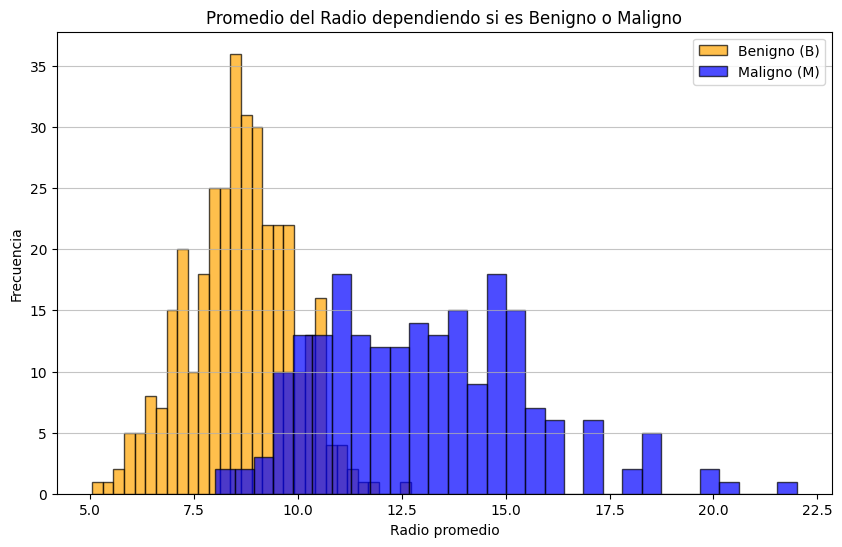

,Radius_mean,Diagnosis
0,14.821667,M
1,15.367833,M
2,14.668533,M
3,8.941867,M
4,14.529067,M
...,...,...
564,16.062000,M
565,14.861833,M
566,12.012133,M
567,15.688667,M


In [243]:
# 10. Crear un gráfico donde se muestre el histograma de la columna RadiusMean separado por las etiquetas B y M, utilizando colores diferentes (naranja y azul, respectivamente) para cada diagnóstico.

df_rm=proms_df['Radius_mean']
df_rm

df_dg=df['Diagnosis']
df_dg

df_hist = pd.concat([df_rm, df_dg], axis=1)   #Tocó crear 2 dataframe y luego concatenarlos

df_hist

# Filtrar los datos según las etiquetas
benigno = df_hist[df_hist['Diagnosis'] == 'B']
maligno = df_hist[df_hist['Diagnosis'] == 'M']

plt.figure(figsize=(10, 6))
plt.hist(benigno['Radius_mean'], bins=30, alpha=0.7, color='orange', label='Benigno (B)', edgecolor='black')
plt.hist(maligno['Radius_mean'], bins=30, alpha=0.7, color='blue', label='Maligno (M)', edgecolor='black')

plt.xlabel('Radio promedio')
plt.ylabel('Frecuencia')
plt.title('Promedio del Radio dependiendo si es Benigno o Maligno')
plt.legend()
plt.grid(axis='y', alpha=0.75)

# Mostrar el gráfico
plt.show()


df_hist


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


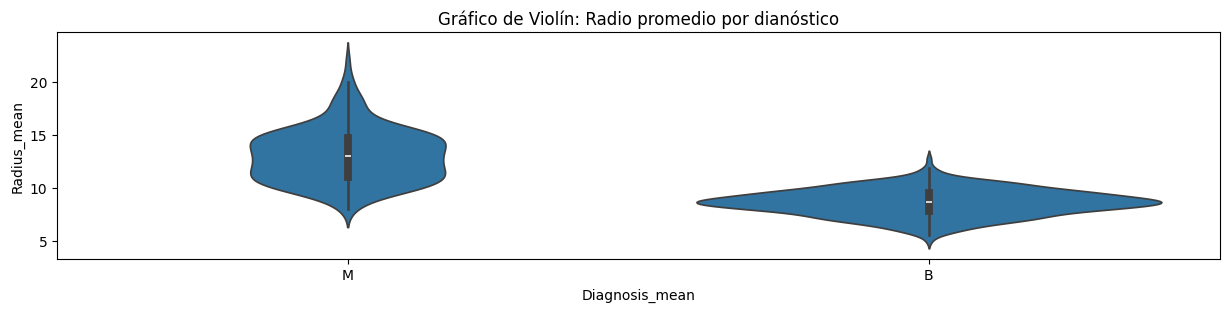

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


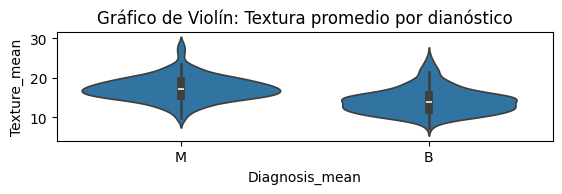

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


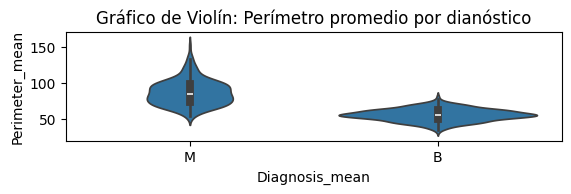

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


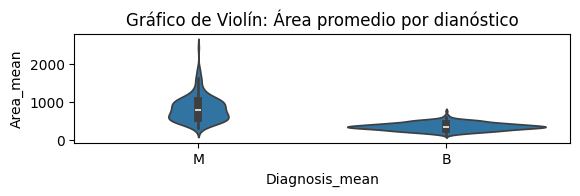

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


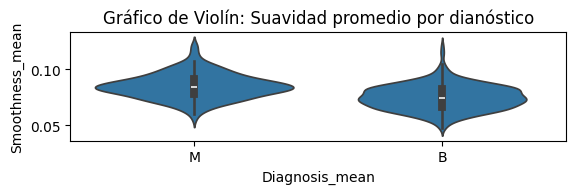

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


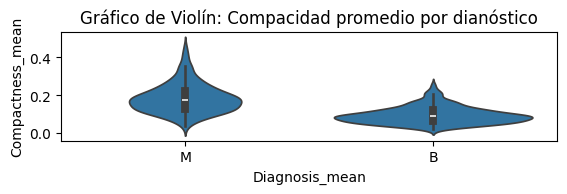

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


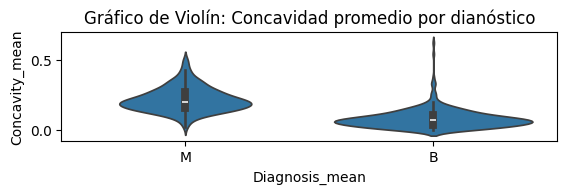

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


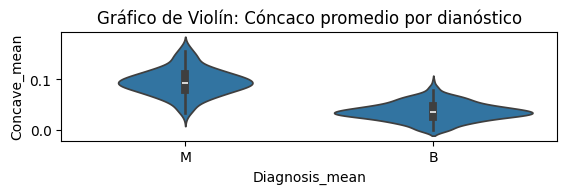

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


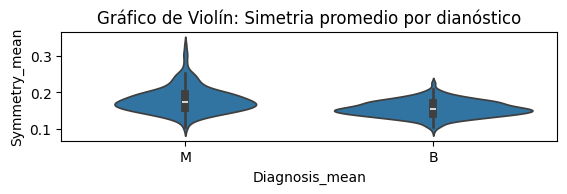

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


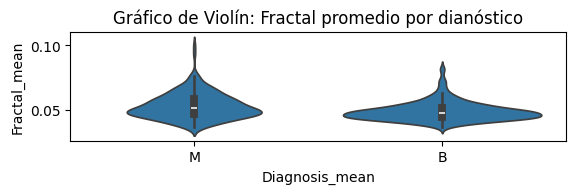

In [244]:
# 11.Generar gráficos de violín para múltiples características

plt.figure(figsize=(15, 10))


plt.subplot(3, 1, 1)
sns.violinplot(data=proms_df, x='Diagnosis_mean', y='Radius_mean')
plt.title('Gráfico de Violín: Radio promedio por dianóstico')
plt.show()

plt.subplot(3, 1, 1)
sns.violinplot(data=proms_df, x='Diagnosis_mean', y='Texture_mean')
plt.title('Gráfico de Violín: Textura promedio por dianóstico')
plt.show()

plt.subplot(3, 1, 1)
sns.violinplot(data=proms_df, x='Diagnosis_mean', y='Perimeter_mean')
plt.title('Gráfico de Violín: Perímetro promedio por dianóstico')
plt.show()

plt.subplot(3, 1, 1)
sns.violinplot(data=proms_df, x='Diagnosis_mean', y='Area_mean')
plt.title('Gráfico de Violín: Área promedio por dianóstico')
plt.show()

plt.subplot(3, 1, 1)
sns.violinplot(data=proms_df, x='Diagnosis_mean', y='Smoothness_mean')
plt.title('Gráfico de Violín: Suavidad promedio por dianóstico')
plt.show()

plt.subplot(3, 1, 1)
sns.violinplot(data=proms_df, x='Diagnosis_mean', y='Compactness_mean')
plt.title('Gráfico de Violín: Compacidad promedio por dianóstico')
plt.show()

plt.subplot(3, 1, 1)
sns.violinplot(data=proms_df, x='Diagnosis_mean', y='Concavity_mean')
plt.title('Gráfico de Violín: Concavidad promedio por dianóstico')
plt.show()

plt.subplot(3, 1, 1)
sns.violinplot(data=proms_df, x='Diagnosis_mean', y='Concave_mean')
plt.title('Gráfico de Violín: Cóncaco promedio por dianóstico')
plt.show()

plt.subplot(3, 1, 1)
sns.violinplot(data=proms_df, x='Diagnosis_mean', y='Symmetry_mean')
plt.title('Gráfico de Violín: Simetria promedio por dianóstico')
plt.show()

plt.subplot(3, 1, 1)
sns.violinplot(data=proms_df, x='Diagnosis_mean', y='Fractal_mean')
plt.title('Gráfico de Violín: Fractal promedio por dianóstico')
plt.show()
# Ajustar el diseño
#plt.tight_layout()



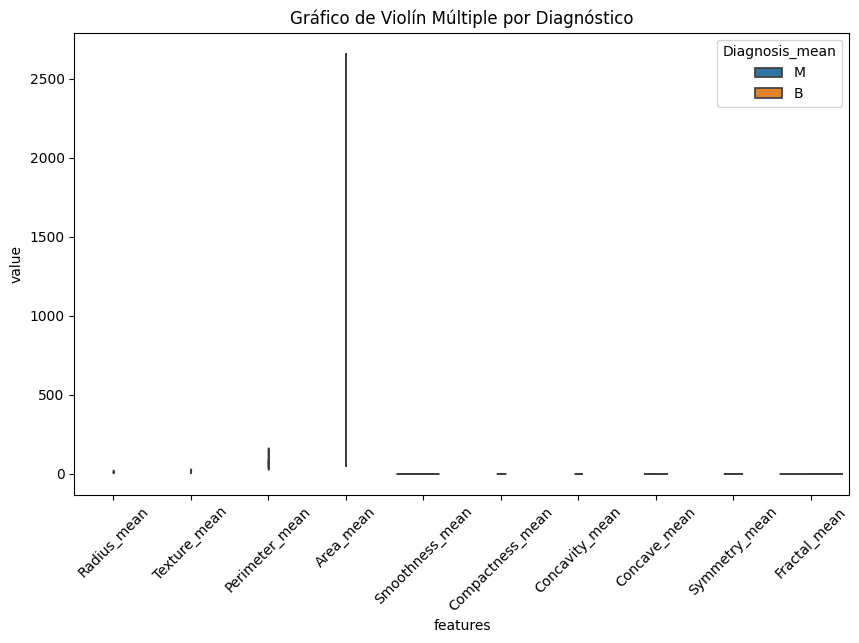

In [245]:

data = pd.melt(proms_df, id_vars="Diagnosis_mean", value_vars=["Radius_mean", "Texture_mean", "Perimeter_mean","Area_mean","Smoothness_mean","Compactness_mean","Concavity_mean","Concave_mean","Symmetry_mean","Fractal_mean"], var_name="features", value_name="value")

# Crear el gráfico de violín múltiple
plt.figure(figsize=(10, 6))
sns.violinplot(x="features", y="value", hue="Diagnosis_mean", data=data, split=True, inner="quart")
plt.xticks(rotation=45)
plt.title('Gráfico de Violín Múltiple por Diagnóstico')
plt.show()

Q1 (25%): 8.3545
Q3 (75%): 11.692433333333332
IQR: 3.337933333333332
Límite Inferior: 3.3476000000000017
Límite Superior: 16.69933333333333

Valores atípicos (outliers) en la columna 'Radius_mean':
     Radius_mean Diagnosis
23     17.007233         M
82     18.705767         M
108    17.295000         M
122    17.259667         M
164    17.314733         M
180    20.392033         M
212    19.697667         M
236    18.426000         M
265    18.130667         M
272    17.035667         M
339    18.396333         M
352    19.951600         M
368    17.889000         M
369    16.892667         M
461    22.002333         M
503    18.390333         M
521    18.513833         M


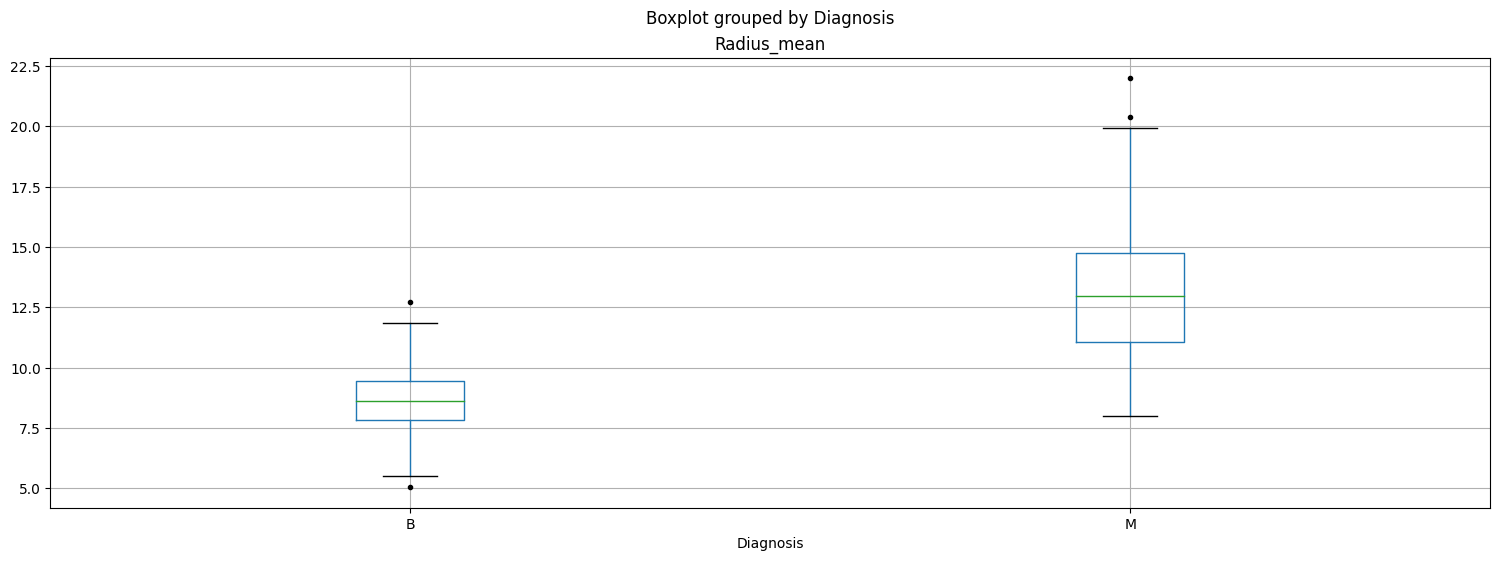

In [246]:
# 12. Determinar y eliminar los valores atípicos (outliers) en la columna RadiusMean

df_hist.boxplot(column="Radius_mean", by='Diagnosis', sym='k.', figsize=(18,6))


#Calulamos los percentiles
Q1 = df_hist['Radius_mean'].quantile(0.25)
Q3 = df_hist['Radius_mean'].quantile(0.75)


#El rango
IQR = Q3 - Q1

#Definimoss unoss limites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificamos los valores atipicos
outliers = df_hist[(df_hist['Radius_mean'] < limite_inferior) | (df_hist['Radius_mean'] > limite_superior)]

print(f"Q1 (25%): {Q1}")
print(f"Q3 (75%): {Q3}")
print(f"IQR: {IQR}")
print(f"Límite Inferior: {limite_inferior}")
print(f"Límite Superior: {limite_superior}")
print("\nValores atípicos (outliers) en la columna 'Radius_mean':")
print(outliers)

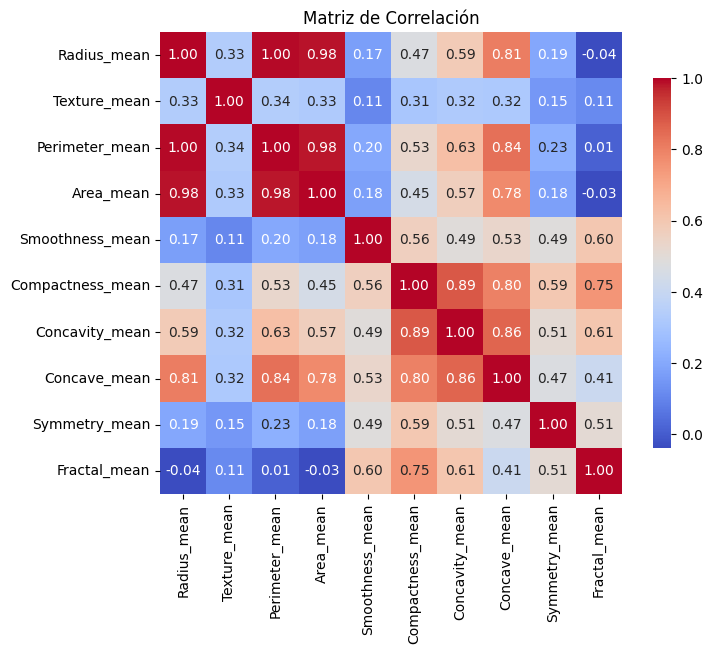

,Radius_mean,Texture_mean,Perimeter_mean,Area_mean,Smoothness_mean,Compactness_mean,Concavity_mean,Concave_mean,Symmetry_mean,Fractal_mean
Radius_mean,1.000000,0.332857,0.995827,0.984912,0.171909,0.472424,0.585876,0.806358,0.193887,-0.037835
Texture_mean,0.332857,1.000000,0.338952,0.325017,0.105176,0.306000,0.324549,0.316863,0.148996,0.112300
Perimeter_mean,0.995827,0.338952,1.000000,0.981303,0.199899,0.525713,0.628980,0.835453,0.225156,0.011709
Area_mean,0.984912,0.325017,0.981303,1.000000,0.175652,0.445490,0.569007,0.780372,0.175169,-0.034591
Smoothness_mean,0.171909,0.105176,0.199899,0.175652,1.000000,0.562209,0.489305,0.529865,0.489112,0.599540
Compactness_mean,0.472424,0.306000,0.525713,0.445490,0.562209,1.000000,0.885177,0.800559,0.594703,0.751990
Concavity_mean,0.585876,0.324549,0.628980,0.569007,0.489305,0.885177,1.000000,0.861956,0.505552,0.606356
Concave_mean,0.806358,0.316863,0.835453,0.780372,0.529865,0.800559,0.861956,1.000000,0.470406,0.408368
Symmetry_mean,0.193887,0.148996,0.225156,0.175169,0.489112,0.594703,0.505552,0.470406,1.000000,0.507403
Fractal_mean,-0.037835,0.112300,0.011709,-0.034591,0.599540,0.751990,0.606356,0.408368,0.507403,1.000000


In [247]:
# 13. Encontrar la matrix de correlación, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.

m_cor=proms_df[['Radius_mean', 'Texture_mean', 'Perimeter_mean','Area_mean','Smoothness_mean','Compactness_mean','Concavity_mean','Concave_mean','Symmetry_mean','Fractal_mean']].corr()

plt.figure(figsize=(8, 6))  # Ajustar el tamaño de la figura
sns.heatmap(m_cor, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})

# Agregar título
plt.title('Matriz de Correlación')
plt.show()

m_cor

In [248]:
# 14. ¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?


1. **Gráfico de dispersión (Scatter Plot)**
Descripción: Muestra la relación entre dos variables numéricas. Cada punto representa un par de valores.
Uso: Ideal para identificar relaciones y patrones entre dos variables. También ayuda a detectar outliers.

2. **Gráfico de cajas (Box Plot)**
Descripción: Muestra la distribución de una variable numérica a través de sus cuartiles y destaca los outliers.
Uso: Útil para comparar la distribución entre diferentes categorías

3. **Histograma**
Descripción: Muestra la distribución de una variable numérica dividiéndola en intervalos (bins).
Uso: Útil para entender la distribución y la frecuencia de los datos.

4. **Gráfico de barras (Bar Plot)**
Descripción: Muestra la cantidad de observaciones de cada categoría.
Uso: Útil para comparar diferentes grupos o categorías

5. **Gráfico de líneas (Line Plot)**
Descripción: Muestra la tendencia de una variable a lo largo del tiempo.
Uso: Ideal para datos temporales.

6. **Matriz de dispersión (Pair Plot)**
Descripción: Muestra gráficos de dispersión para todas las combinaciones de columnas numéricas.
Uso: Útil para explorar las relaciones entre múltiples variables.

7. **Gráfico de violín (Violin Plot)**
Descripción: Combina un gráfico de cajas y un histograma para mostrar la distribución de los datos.
Uso: Útil para comparar la distribución de diferentes categorías.

8. **Gráfico de correlación (Correlation Plot)**
Descripción: Similar al heatmap, muestra la correlación entre varias variables.
Uso: Útil para identificar rápidamente las relaciones entre múltiples variables.



